In [5]:
from matplotlib import pyplot as plt
plt.style.use('bmh')
import numpy as np
import sympy

## Define diffusivity and their derivative
Using sympy to find the function and the derivative.

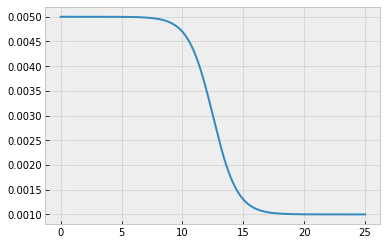

In [12]:
sympy.init_printing()

#Make z as symbolic
z = sympy.symbols('z')
H=25.0
K0=5e-3
K1=1e-3
turncation=H/2
scale=1

#Difining the diffusivity profile
sym_Diffu = K0+(K1-K0)*(1-1/(1+sympy.exp(-(turncation-z)/scale)))
#using symbolic derivation
sym_dKdz = sympy.diff(sym_Diffu, z, 1)
sym_d2Kdz2 =  sympy.diff(sym_Diffu, z, 2)
sym_d3Kdz3   =  sympy.diff(sym_Diffu, z, 3)

#Making lambda function
Diffu  =  sympy.utilities.lambdify(z,sym_Diffu,np)
dKdz   =  sympy.utilities.lambdify(z,sym_dKdz,np)
d2Kdz =  sympy.utilities.lambdify(z,sym_d2Kdz2,np)
d3Kdz = sympy.utilities.lambdify(z,sym_d3Kdz3,np)

zc=np.linspace(0,H, 1000)
plt.plot(zc, Diffu(zc))

#delete the symbol
del z 

## Lagrangian scheme

In [7]:
################
#Euler-Maruyama#
################
def step_m(z,H,dt,dW,w=0):
    dkdz=dKdz(z)
    b=np.sqrt(2*Diffu(z))
    
    temp= z + w*dt + (1/2)*dkdz*(dW*dW+dt) + b*dW
    temp=np.where(temp<0.0, -temp,temp)
    temp=np.where(temp>H, 2*H-temp,temp)
    return temp

##########
#Milstein#
##########
def step_e(z,H,dt,dW,w=0):
    a=w+dKdz(z)
    b=np.sqrt(2*Diffu(z))
    
    temp=z+a*dt+b*dW
    temp=np.where(temp<0, -temp ,temp)
    temp=np.where(temp>H, 2*H-temp,temp)
    return temp

## Some utillities functions

In [8]:
# This function will return Euler-maruyama and/or Milstein for different time step under a same wiener process.
def get_tranjectory():
    TimeEnd=10000
    #Define how many time step do you want to jump
    jump=np.array([1,2,4,8,16,32]) 
    Nt=100*jump[-1]+1
    
    TimeArray=np.linspace(0,TimeEnd,Nt)
    print("TimeArray size: ", TimeArray.size)
    dt=TimeArray[1]-TimeArray[0]
    dW=np.random.normal(0,dt,Nt)
    Wiener=np.cumsum(dW)
    
    ZE1=np.zeros(len(dW))
    ZE2=np.zeros(int(len(dW)/2)+1)
    ZE4=np.zeros(int(len(dW)/4)+1)
    ZE8=np.zeros(int(len(dW)/8)+1)
    ZE16=np.zeros(int(len(dW)/16)+1)
    ZE32=np.zeros(int(len(dW)/32)+1)
    
    ZM1=np.zeros(len(dW))
    ZM2=np.zeros(int(len(dW)/2)+1)
    ZM4=np.zeros(int(len(dW)/4)+1)
    ZM8=np.zeros(int(len(dW)/8)+1)
    ZM16=np.zeros(int(len(dW)/16)+1)
    ZM32=np.zeros(int(len(dW)/32)+1)
   
    ZE1[0]=17
    ZE2[0]=17
    ZE4[0]=17
    ZE8[0]=17
    ZE16[0]=17
    ZE32[0]=17
    
    ZM1[0]=17
    ZM2[0]=17
    ZM4[0]=17
    ZM8[0]=17
    ZM16[0]=17
    ZM32[0]=17
    
    for i in range (1,len(ZE1)):
        dW=Wiener[i*jump[0]]-Wiener[(i-1)*jump[0]]
        ZE1[i]=step_e(ZE1[i-1],H,dt,dW)
        ZM1[i]=step_m(ZM1[i-1],H,dt,dW)
    
    for i in range (1,len(ZE2)):
        dW=Wiener[i*jump[1]]-Wiener[(i-1)*jump[1]]
        ZE2[i]=step_e(ZE2[i-1],H,dt*jump[1],dW)
        ZM2[i]=step_m(ZM2[i-1],H,dt*jump[1],dW)
        
    for i in range (1,len(ZE4)):
        dW=Wiener[i*jump[2]]-Wiener[(i-1)*jump[2]]
        ZE4[i]=step_e(ZE4[i-1],H,dt*jump[2],dW)
        ZM4[i]=step_m(ZM4[i-1],H,dt*jump[2],dW)
    
    for i in range (1,len(ZE8)):
        dW=Wiener[i*jump[3]]-Wiener[(i-1)*jump[3]]
        ZE8[i]=step_e(ZE8[i-1],H,dt*jump[3],dW)
        ZM8[i]=step_m(ZM8[i-1],H,dt*jump[3],dW)
    
    for i in range (1,len(ZE16)):
        dW=Wiener[i*jump[4]]-Wiener[(i-1)*jump[4]]
        ZE16[i]=step_e(ZE16[i-1],H,dt*jump[4],dW)
        ZM16[i]=step_m(ZM16[i-1],H,dt*jump[4],dW)
    
    for i in range (1,len(ZE32)):
        dW=Wiener[i*jump[5]]-Wiener[(i-1)*jump[5]]
        ZE32[i]=step_e(ZE32[i-1],H,dt*jump[5],dW)
        ZM32[i]=step_m(ZM32[i-1],H,dt*jump[5],dW)
    
    return ZE1, ZE2, ZE4, ZE8, ZE16, ZE32, TimeArray
    #return ZM1, ZM2, ZM4, ZM8, ZM16, ZM32, TimeArray

# This function will return strong convergence of Euler-maruyama and/or Milstein under a same wiener process.
def get_error():
    
    TimeEnd=100
    jump=np.array([1,2,4,8,16,32]) 
    Nt=100*jump[-1]+1
    
    TimeArray=np.linspace(0,TimeEnd,Nt)
    #print("TimeArray size: ", TimeArray.size)
    dt=TimeArray[1]-TimeArray[0]
    dW=np.random.normal(0,dt,Nt)
    Wiener=np.cumsum(dW)
    
    ZE1=np.zeros(len(dW))
    ZE2=np.zeros(int(len(dW)/2)+1)
    ZE4=np.zeros(int(len(dW)/4)+1)
    ZE8=np.zeros(int(len(dW)/8)+1)
    ZE16=np.zeros(int(len(dW)/16)+1)
    ZE32=np.zeros(int(len(dW)/32)+1)
    
    ZM1=np.zeros(len(dW))
    ZM2=np.zeros(int(len(dW)/2)+1)
    ZM4=np.zeros(int(len(dW)/4)+1)
    ZM8=np.zeros(int(len(dW)/8)+1)
    ZM16=np.zeros(int(len(dW)/16)+1)
    ZM32=np.zeros(int(len(dW)/32)+1)
   
    ZE1[0]=17
    ZE2[0]=17
    ZE4[0]=17
    ZE8[0]=17
    ZE16[0]=17
    ZE32[0]=17
    
    ZM1[0]=17
    ZM2[0]=17
    ZM4[0]=17
    ZM8[0]=17
    ZM16[0]=17
    ZM32[0]=17
    
    
    for i in range (1,len(ZE1)):
        dW=Wiener[i*jump[0]]-Wiener[(i-1)*jump[0]]
        ZE1[i]=step_e(ZE1[i-1],H,dt,dW)
        ZM1[i]=step_m(ZM1[i-1],H,dt,dW)
    
    for i in range (1,len(ZE2)):
        dW=Wiener[i*jump[1]]-Wiener[(i-1)*jump[1]]
        ZE2[i]=step_e(ZE2[i-1],H,dt*jump[1],dW)
        ZM2[i]=step_m(ZM2[i-1],H,dt*jump[1],dW)
        
    for i in range (1,len(ZE4)):
        dW=Wiener[i*jump[2]]-Wiener[(i-1)*jump[2]]
        ZE4[i]=step_e(ZE4[i-1],H,dt*jump[2],dW)
        ZM4[i]=step_m(ZM4[i-1],H,dt*jump[2],dW)
    
    for i in range (1,len(ZE8)):
        dW=Wiener[i*jump[3]]-Wiener[(i-1)*jump[3]]
        ZE8[i]=step_e(ZE8[i-1],H,dt*jump[3],dW)
        ZM8[i]=step_m(ZM8[i-1],H,dt*jump[3],dW)
    
    for i in range (1,len(ZE16)):
        dW=Wiener[i*jump[4]]-Wiener[(i-1)*jump[4]]
        ZE16[i]=step_e(ZE16[i-1],H,dt*jump[4],dW)
        ZM16[i]=step_m(ZM16[i-1],H,dt*jump[4],dW)
    
    for i in range (1,len(ZE32)):
        dW=Wiener[i*jump[5]]-Wiener[(i-1)*jump[5]]
        ZE32[i]=step_e(ZE32[i-1],H,dt*jump[5],dW)
        ZM32[i]=step_m(ZM32[i-1],H,dt*jump[5],dW)
    
    Error_e=np.zeros(len(jump)-1)
    Error_m=np.zeros(len(jump)-1)
    
    Error_e[0]=ZE1[-1]-ZE2[-1]
    Error_e[1]=ZE1[-1]-ZE4[-1]
    Error_e[2]=ZE1[-1]-ZE8[-1]
    Error_e[3]=ZE1[-1]-ZE16[-1]
    Error_e[4]=ZE1[-1]-ZE32[-1]
    
    Error_m[0]=ZM1[-1]-ZM2[-1]
    Error_m[1]=ZM1[-1]-ZM4[-1]
    Error_m[2]=ZM1[-1]-ZM8[-1]
    Error_m[3]=ZM1[-1]-ZM16[-1]
    Error_m[4]=ZM1[-1]-ZM32[-1]
    
    return np.abs(Error_e),np.abs(Error_m),dt

TimeArray size:  3201


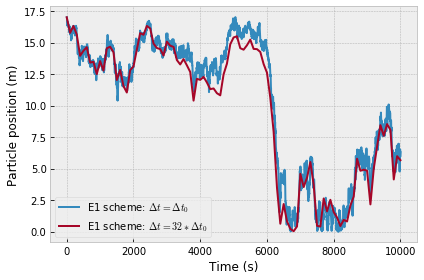

In [9]:
#%%
#Part 1 Get tranjectory plot
    
ZE1, ZE2, ZE4, ZE8, ZE16, ZE32, TimeArray=get_tranjectory()

fig=plt.figure()
plt.plot(TimeArray,ZE1, label="E1 scheme: $\Delta t=\Delta t_0$")
plt.plot(TimeArray[0::32],ZE32, label="E1 scheme: $\Delta t=32*\Delta t_0$")
plt.xlabel("Time (s)")
plt.ylabel("Particle position (m)")
plt.legend()
plt.tight_layout()

wait to the 100 %


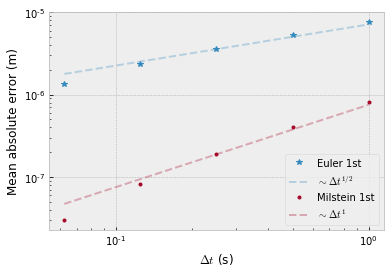

In [11]:
#%%
#Part 2 Calculate strong convergence

Np=2000
Error_e, Error_m,dt=get_error()
print("wait to the 100 %")
for i in range(1,Np):
    temp_e,temp_m,_=get_error()
    Error_e=temp_e+Error_e
    Error_m=temp_m+Error_m
    print("\r ", (i+1)*100/Np, "%", end="\r",flush=True)

    
Error_e=Error_e/Np
Error_m=Error_m/Np

dtArray=dt*np.array([2,4,8,16,32]) 

i=2
l,=plt.plot(dtArray,Error_e,"*",label="Euler 1st")
plt.plot(dtArray, (Error_e[i]/dtArray[i]**(1/2)) * dtArray**(1/2), "--",
         c = l.get_color(), label = "$\sim \Delta t^{1/2}$", alpha=0.3)

l,=plt.plot(dtArray,Error_m,".",label="Milstein 1st")
plt.plot(dtArray, (Error_m[i]/dtArray[i]**1) * dtArray**1, "--",
         c = l.get_color(), label = "$\sim \Delta t^1$", alpha=0.3)


plt.xlabel('$\Delta t$ (s)')
plt.ylabel('Mean absolute error (m)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
#plt.axis('equal')
plt.savefig("figure")
